# What is Machine Learning?

## For many problems, it’s difficult to program the correct behavior by hand
- recognising people and objects
- understanding human speech
- predictive text
- spam filtering

## Machine learning approach: program an algorithm to automatically learn from data, or from experience

## Why might you want to use a learning algorithm?
-  hard to code up a solution by hand (e.g. vision, speech)
-  system needs to adapt to a changing environment (e.g. spam detection)
- want the system to perform better than the human programmers
- privacy/fairness (e.g. ranking search results)


## Types of Machine Learning

- Supervised Machine Learning: have labelled examples of the correct behaviour
- Reinforcement Learning: Learning system (agent) interacts with the world and learns to maximise a scalar reward signal
- Unsupervised Learning: no labelled examples -- instead the algorithm just looks for patterns in the data

## An Example of a Task that Requires Machine Learning


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

![title](charater_rec.png)

# Classification vs Regression Models

### Regression models predict continuous values. This means they estimate a number within a range.

### Examples: Predicting house prices, forecasting sales, or estimating the temperature.

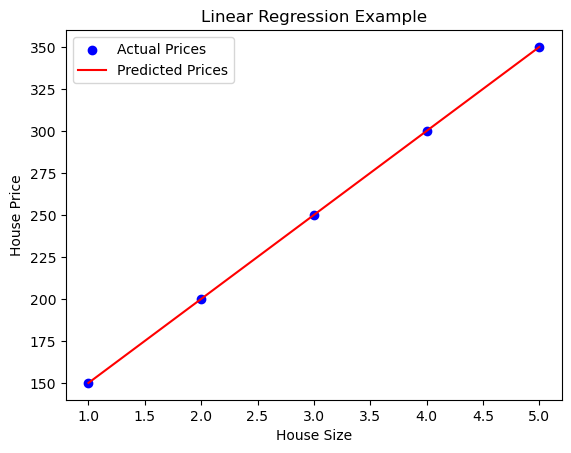

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # House sizes
y = np.array([150, 200, 250, 300, 350])      # House prices

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


### Purpose: Classification models predict categorical values. This means they assign data into distinct classes or categories.

### Examples: Determining if an email is spam or not, classifying images of animals, or diagnosing diseases.

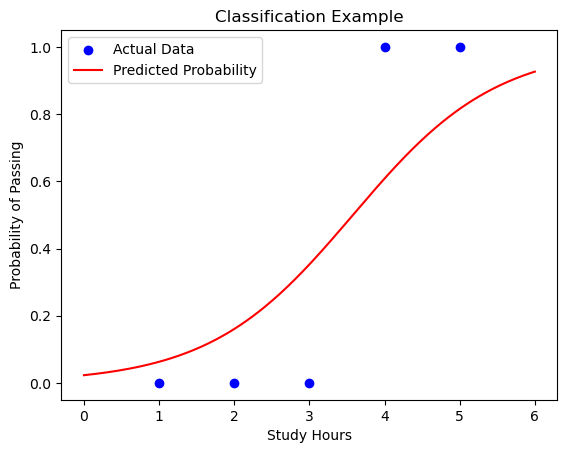

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Study hours
y = np.array([0, 0, 0, 1, 1])                # Pass (1) or Fail (0)

# Create and train the model
model = LogisticRegression()
model.fit(X, y)

# Predictions
X_test = np.linspace(0, 6, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_prob, color='red', label='Predicted Probability')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Classification Example')
plt.legend()
plt.show()


## Where do we start?

- Machine learning is about learning some properties of a data set and then testing those properties against another data set. 

- A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties.
- We call the other set the **testing set** on which we test the learned properties

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [10]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

C:\Users\hjbec\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


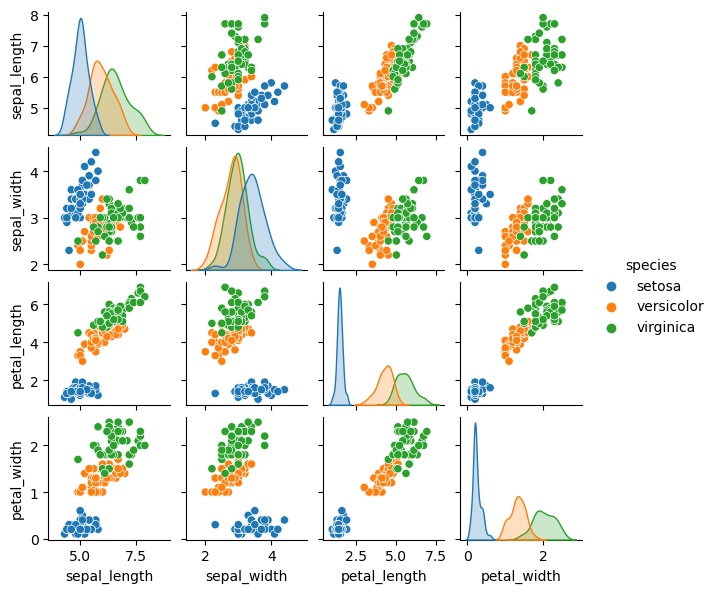

In [11]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

We need to decide on two important things here:
- The target array (y), which is the category we want to predict. Let's say in this case it is the species.
- We will predict the species based on the feature matrix (x), which is a matrix made up of petal_length, petal_width, sepai_length, and sepai_width).
- There are 150 samples in the Iris dataset. What do you think the shape of the feature matrix is?

In [14]:
# Let's create the feature matrix, it is everything except the species, since that's the y axis, so let's get rid of it

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [16]:
# and the target array is just the species, so let's grab that

y_iris = iris['species']
y_iris.shape

(150,)

### Basics of Scikit-Learn

Most commonly, the steps in using the Scikit-Learn are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods. This afternoon, you will be able to code your own machine learning project using the data we provide.

Step1: Choose your Class of Model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [12]:
from sklearn.linear_model import LinearRegression

Step2: Choose the Model Hyperparametres

- ** What are Hyperparameters?** 
    - Hyperparameters are settings that control the learning process of a machine learning model.
    - They are set before the training starts and are not learned from the data.
- **Examples of Hyperparameters:**
    - Learning Rate: This controls how much the model adjusts its parameters with each step during training.
    - Number of Trees in a Random Forest: This determines how many decision trees the model will use.
    - Number of Neurons in a Neural Network Layer: This sets how many neurons are in each layer of the network.
- **Why are Hyperparameters Important?**
    - Choosing the right hyperparameters can make a big difference in how well the model performs.
    - It’s like tuning a car engine; the right settings can make the car run smoothly and efficiently.
- **How to Find the Best Hyperparameters?**
Often, you try different settings and see which ones work best. This process is called hyperparameter tuning.

Since we are using a linear regression model, we have to worry about very few hyperparametres compared to more complex algorithms. 

In [13]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Step 3: Arrange our Data

Let's create a little dataset using random numbers for this example

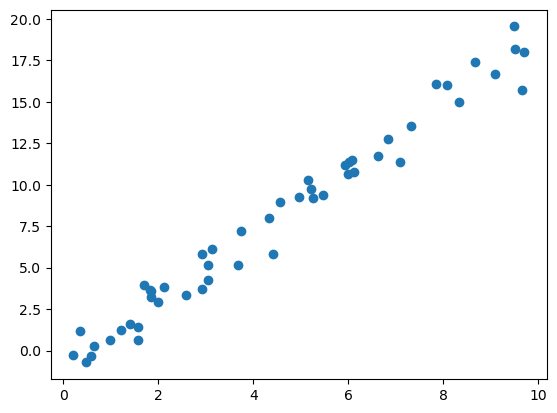

In [22]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
X = x[:, np.newaxis]
plt.scatter(x, y);

Step5: Let's fit that to our model 

In [23]:
model.fit(X, y)

LinearRegression()

Step6: Predict labels for unknown data

So now we've trained our model on the randomly generated data. Let's try and use it to predict labels. Let's create a new feature matrix, this time without any y labels:

In [24]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

In [26]:
# Now we can use the predict method 

yfit = model.predict(Xfit)

yfit is an array of labels that we predicted for our new feature matrix
let's visualize the results by plotting first the raw data, and then this model fit 

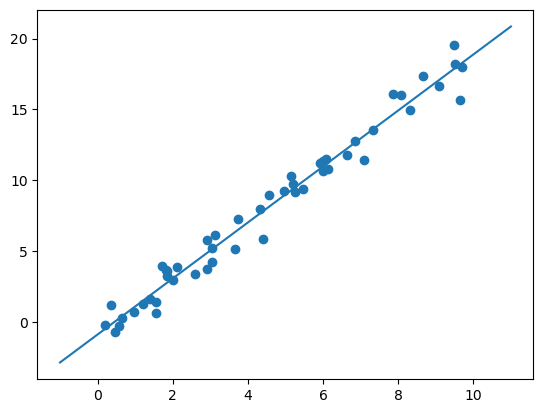

In [27]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Now that we know the steps, let's try them for some real data

Let's use the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use a simple generative model known as *Gaussian naive Bayes*, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.

Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.



Remember what we said about needing a training set and a testing set? Scikit-Learn has got us covered there. It has a method built in to randomly sample a test set from the full set:

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Now we can follow the steps outlined above:

In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
# 2. We don't need to choose any hyperparameters
# 3. We already arranged our data into a feature matrix and target vector
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

So how well does this model classify the Irises? Luckily we already have all the original labels for the test set, so we can see how well the model performed by usi.

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

NameError: name 'X_2D' is not defined